In [1]:
#!pip install fastai -Uqq
#!pip install -Uqq openpyxl

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)
from IPython.display import display

In [21]:
#import glob
#filenames = glob.glob('./uHoo/*.xlsx')
dirpath = './uHoo/'

import os
from pathlib import Path
paths = sorted(Path(dirpath).glob("*.xlsx"), key=os.path.basename)
rawdf = pd.concat([pd.read_excel(f, header=None) for f in paths])
rawdf

0         1             2        3      4            5         6      7    8   9     10    11     12  \
0                        Date/time  Instance        Sensor    Value  Units  Temperature  Humidity  PM2.5  CO2  CO  TVOC   NO2  Ozone   
1     February 15, 2020 at 04:19PM    Walnut  Air Pressure  1010.97   mbar         21.4      33.9    7.9  807   0    53  21.9    7.9   
2     February 15, 2020 at 04:20PM    Walnut  Air Pressure     1011   mbar         21.4      33.9    7.9  808   0    55  22.1    7.9   
3     February 15, 2020 at 04:23PM    Walnut  Air Pressure  1011.07   mbar         21.4      33.8    7.3  808   0    55  21.1    7.8   
4     February 15, 2020 at 04:24PM    Walnut  Air Pressure   1011.1   mbar         21.4      33.9    7.6  812   0    55  22.4    7.9   
...                            ...       ...           ...      ...    ...          ...       ...    ...  ...  ..   ...   ...    ...   
1599      March 1, 2022 at 05:08AM    Walnut  Air Pressure  1009.21   mbar         17.9      33.1      5  457   0    20  53.1    9.7   
1600      March 1, 2022 at 05:09AM    Walnut  Air Pressure  1009.15   mbar         17.9      32.3      5  461   0    20  52.3    9.6   
1601      March 1, 2022 at 06:06AM    Walnut  Air Pressure  1008.82   mbar         17.9      30.5      8  463   0    41  58.5    9.8   
1602      March 1, 2022 at 06:07AM    Walnut  Air Pressure  1008.85   mbar         17.8      31.5      5  462   0    41  55.6    9.7   
1603      March 1, 2022 at 06:08AM    Walnut  Air Pressure  1008.87   mbar         17.7      32.4      5  459   0    38  55.7    9.8   

            13  
0     Pressure  
1         1011  
2         1011  
3       1011.1  
4       1011.1  
...        ...  
1599    1009.2  
1600    1009.1  
1601    1008.8  
1602    1008.9  
1603    1008.9  

[52682 rows x 14 columns]

In [22]:
from datetime import datetime
format="%B %d, %Y at %I:%M%p"
d = datetime.strptime("March 10, 2021 at 05:10PM", format)
print(d)
print(d.strftime("%A"))

2021-03-10 17:10:00
Wednesday


In [23]:
df = rawdf.copy()

# turn first row into column labels
df.columns = df.iloc[0]

# Drop the column data row
df = df.iloc[1:]

# Drop useless columns
df = df.drop(['Instance', 'Sensor', 'Value', 'Units'], axis=1)

# Convert first column to date type
df['Date/time'] = pd.to_datetime(df['Date/time'], format="%B %d, %Y at %I:%M%p")

# Convert everything else to numeric
numeric_cols = ['Temperature','Humidity','PM2.5','CO2','CO','TVOC','NO2','Ozone','Pressure']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# Renumber from zero
df = df.reset_index(drop=True)

df

0               Date/time  Temperature  Humidity  PM2.5  CO2   CO  TVOC   NO2  Ozone  Pressure
0     2020-02-15 16:19:00         21.4      33.9    7.9  807  0.0    53  21.9    7.9    1011.0
1     2020-02-15 16:20:00         21.4      33.9    7.9  808  0.0    55  22.1    7.9    1011.0
2     2020-02-15 16:23:00         21.4      33.8    7.3  808  0.0    55  21.1    7.8    1011.1
3     2020-02-15 16:24:00         21.4      33.9    7.6  812  0.0    55  22.4    7.9    1011.1
4     2020-02-15 16:25:00         21.4      33.9    7.4  813  0.0    54  21.5    7.9    1011.1
...                   ...          ...       ...    ...  ...  ...   ...   ...    ...       ...
52676 2022-03-01 05:08:00         17.9      33.1    5.0  457  0.0    20  53.1    9.7    1009.2
52677 2022-03-01 05:09:00         17.9      32.3    5.0  461  0.0    20  52.3    9.6    1009.1
52678 2022-03-01 06:06:00         17.9      30.5    8.0  463  0.0    41  58.5    9.8    1008.8
52679 2022-03-01 06:07:00         17.8      31.5    5.0  462  0.0    41  55.6    9.7    1008.9
52680 2022-03-01 06:08:00         17.7      32.4    5.0  459  0.0    38  55.7    9.8    1008.9

[52681 rows x 10 columns]

In [ ]:
df.describe()

0       Temperature      Humidity         PM2.5           CO2            CO          TVOC           NO2         Ozone      Pressure
count  52681.000000  52681.000000  52681.000000  52681.000000  52681.000000  52681.000000  52681.000000  52681.000000  52681.000000
mean      21.636465     41.753378      2.310634    754.625368      0.014210    151.947419     17.925527      7.790251   1000.667227
std        1.762421     10.921825      2.813047    201.405182      0.178755    229.485451     21.146656      0.997603      7.259274
min       12.500000     10.700000      1.000000    400.000000      0.000000      0.000000      0.000000      3.600000    971.800000
25%       21.400000     31.800000      1.000000    569.000000      0.000000     24.000000      0.800000      7.100000    996.000000
50%       22.100000     42.100000      1.000000    775.000000      0.000000     70.000000     10.200000      7.600000   1000.200000
75%       22.700000     51.300000      3.000000    900.000000      0.000000    171.000000     27.900000      8.100000   1005.400000
max       27.400000     82.000000    123.200000   2050.000000      7.900000   1200.000000    181.400000     13.600000   1025.200000

In [122]:
#df['Weekday']=df['Date/time'].apply(lambda d:d.strftime("%A"))
#df

In [123]:
#df = pd.get_dummies(df, columns=["Weekday"])
#df.columns

<AxesSubplot: xlabel='Date/time'>

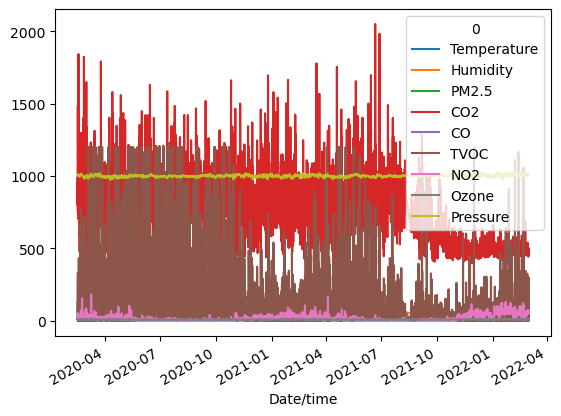

In [24]:
# Set date/time index
df = df.set_index('Date/time')
df['datetime'] = df.index
df[numeric_cols].plot.line()

<AxesSubplot: xlabel='Date/time'>

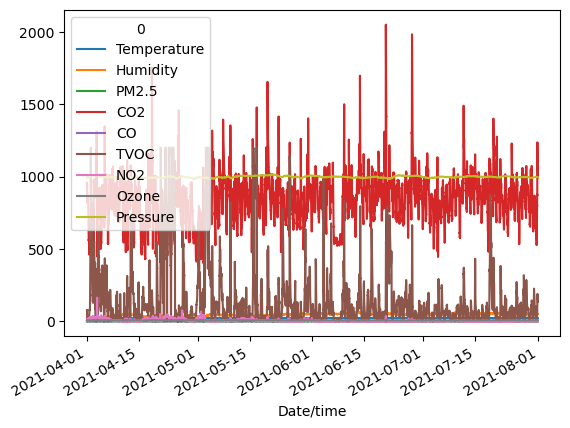

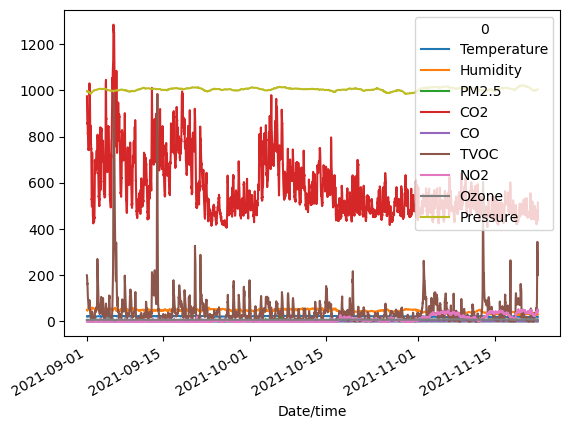

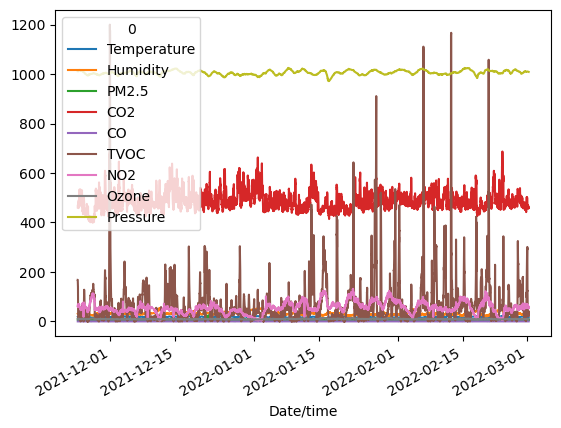

In [25]:
# 3 sensor locations 
df1 = df[(df['datetime'] >= '2021-04-01') & (df['datetime'] < '2021-08-01')]
df2 = df[(df['datetime'] >= '2021-09-01') & (df['datetime'] < '2021-11-23')]
df3 = df[(df['datetime'] >= '2021-11-24')]

df1[numeric_cols].plot.line()
df2[numeric_cols].plot.line()
df3[numeric_cols].plot.line()

In [26]:
df3

0                    Temperature  Humidity  PM2.5  CO2   CO  TVOC   NO2  Ozone  Pressure            datetime
Date/time                                                                                                   
2021-11-24 00:06:00         17.7      30.3    7.0  461  0.0   168  60.3    9.9    1012.0 2021-11-24 00:06:00
2021-11-24 00:07:00         17.6      30.2    4.0  465  0.0   168  59.1    9.8    1012.1 2021-11-24 00:07:00
2021-11-24 00:08:00         17.7      30.7    4.0  469  0.0   165  58.8    9.8    1012.0 2021-11-24 00:08:00
2021-11-24 01:07:00         17.2      29.5    5.0  469  0.0   141  67.8   10.2    1012.3 2021-11-24 01:07:00
2021-11-24 01:08:00         17.1      29.3    5.0  469  0.0   141  68.8   10.3    1012.3 2021-11-24 01:08:00
...                          ...       ...    ...  ...  ...   ...   ...    ...       ...                 ...
2022-03-01 05:08:00         17.9      33.1    5.0  457  0.0    20  53.1    9.7    1009.2 2022-03-01 05:08:00
2022-03-01 05:09:00         17.9      32.3    5.0  461  0.0    20  52.3    9.6    1009.1 2022-03-01 05:09:00
2022-03-01 06:06:00         17.9      30.5    8.0  463  0.0    41  58.5    9.8    1008.8 2022-03-01 06:06:00
2022-03-01 06:07:00         17.8      31.5    5.0  462  0.0    41  55.6    9.7    1008.9 2022-03-01 06:07:00
2022-03-01 06:08:00         17.7      32.4    5.0  459  0.0    38  55.7    9.8    1008.9 2022-03-01 06:08:00

[6911 rows x 10 columns]

In [27]:
from fastai.tabular.core import add_datepart
dfall = df3.copy()
add_datepart(dfall, 'datetime', drop=False)


0                    Temperature  Humidity  PM2.5  CO2   CO  TVOC   NO2  Ozone  Pressure            datetime  ...  datetimeDay  \
Date/time                                                                                                     ...                
2021-11-24 00:06:00         17.7      30.3    7.0  461  0.0   168  60.3    9.9    1012.0 2021-11-24 00:06:00  ...           24   
2021-11-24 00:07:00         17.6      30.2    4.0  465  0.0   168  59.1    9.8    1012.1 2021-11-24 00:07:00  ...           24   
2021-11-24 00:08:00         17.7      30.7    4.0  469  0.0   165  58.8    9.8    1012.0 2021-11-24 00:08:00  ...           24   
2021-11-24 01:07:00         17.2      29.5    5.0  469  0.0   141  67.8   10.2    1012.3 2021-11-24 01:07:00  ...           24   
2021-11-24 01:08:00         17.1      29.3    5.0  469  0.0   141  68.8   10.3    1012.3 2021-11-24 01:08:00  ...           24   
...                          ...       ...    ...  ...  ...   ...   ...    ...       ...                 ...  ...          ...   
2022-03-01 05:08:00         17.9      33.1    5.0  457  0.0    20  53.1    9.7    1009.2 2022-03-01 05:08:00  ...            1   
2022-03-01 05:09:00         17.9      32.3    5.0  461  0.0    20  52.3    9.6    1009.1 2022-03-01 05:09:00  ...            1   
2022-03-01 06:06:00         17.9      30.5    8.0  463  0.0    41  58.5    9.8    1008.8 2022-03-01 06:06:00  ...            1   
2022-03-01 06:07:00         17.8      31.5    5.0  462  0.0    41  55.6    9.7    1008.9 2022-03-01 06:07:00  ...            1   
2022-03-01 06:08:00         17.7      32.4    5.0  459  0.0    38  55.7    9.8    1008.9 2022-03-01 06:08:00  ...            1   

0                    datetimeDayofweek  datetimeDayofyear  datetimeIs_month_end  datetimeIs_month_start  datetimeIs_quarter_end  \
Date/time                                                                                                                         
2021-11-24 00:06:00                  2                328                 False                   False                   False   
2021-11-24 00:07:00                  2                328                 False                   False                   False   
2021-11-24 00:08:00                  2                328                 False                   False                   False   
2021-11-24 01:07:00                  2                328                 False                   False                   False   
2021-11-24 01:08:00                  2                328                 False                   False                   False   
...                                ...                ...                   ...                     ...                     ...   
2022-03-01 05:08:00                  1                 60                 False                    True                   False   
2022-03-01 05:09:00                  1                 60                 False                    True                   False   
2022-03-01 06:06:00                  1                 60                 False                    True                   False   
2022-03-01 06:07:00                  1                 60                 False                    True                   False   
2022-03-01 06:08:00                  1                 60                 False                    True                   False   

0                    datetimeIs_quarter_start  datetimeIs_year_end  datetimeIs_year_start  datetimeElapsed  
Date/time                                                                                                   
2021-11-24 00:06:00                     False                False                  False     1.637712e+09  
2021-11-24 00:07:00                     False                False                  False     1.637712e+09  
2021-11-24 00:08:00                     False                False                  False     1.637712e+09  
2021-11-24 01:07:00                     False               

In [28]:
dfall.reset_index(drop=True, inplace=True)
dfall

0     Temperature  Humidity  PM2.5  CO2   CO  TVOC   NO2  Ozone  Pressure            datetime  ...  datetimeDay  datetimeDayofweek  \
0            17.7      30.3    7.0  461  0.0   168  60.3    9.9    1012.0 2021-11-24 00:06:00  ...           24                  2   
1            17.6      30.2    4.0  465  0.0   168  59.1    9.8    1012.1 2021-11-24 00:07:00  ...           24                  2   
2            17.7      30.7    4.0  469  0.0   165  58.8    9.8    1012.0 2021-11-24 00:08:00  ...           24                  2   
3            17.2      29.5    5.0  469  0.0   141  67.8   10.2    1012.3 2021-11-24 01:07:00  ...           24                  2   
4            17.1      29.3    5.0  469  0.0   141  68.8   10.3    1012.3 2021-11-24 01:08:00  ...           24                  2   
...           ...       ...    ...  ...  ...   ...   ...    ...       ...                 ...  ...          ...                ...   
6906         17.9      33.1    5.0  457  0.0    20  53.1    9.7    1009.2 2022-03-01 05:08:00  ...            1                  1   
6907         17.9      32.3    5.0  461  0.0    20  52.3    9.6    1009.1 2022-03-01 05:09:00  ...            1                  1   
6908         17.9      30.5    8.0  463  0.0    41  58.5    9.8    1008.8 2022-03-01 06:06:00  ...            1                  1   
6909         17.8      31.5    5.0  462  0.0    41  55.6    9.7    1008.9 2022-03-01 06:07:00  ...            1                  1   
6910         17.7      32.4    5.0  459  0.0    38  55.7    9.8    1008.9 2022-03-01 06:08:00  ...            1                  1   

0     datetimeDayofyear  datetimeIs_month_end  datetimeIs_month_start  datetimeIs_quarter_end  datetimeIs_quarter_start  \
0                   328                 False                   False                   False                     False   
1                   328                 False                   False                   False                     False   
2                   328                 False                   False                   False                     False   
3                   328                 False                   False                   False                     False   
4                   328                 False                   False                   False                     False   
...                 ...                   ...                     ...                     ...                       ...   
6906                 60                 False                    True                   False                     False   
6907                 60                 False                    True                   False                     False   
6908                 60                 False                    True                   False                     False   
6909                 60                 False                    True                   False                     False   
6910                 60                 False                    True                   False                     False   

0     datetimeIs_year_end  datetimeIs_year_start  datetimeElapsed  
0                   False                  False     1.637712e+09  
1                   False                  False     1.637712e+09  
2                   False                  False     1.637712e+09  
3                   False                  False     1.637716e+09  
4                   False                  False     1.637716e+09  
...                   ...                    ...              ...  
6906                False                  False     1.646111e+09  
6907                False                  False     1.646111e+09  
6908                False                  False     1.646115e+09  
6909                False                  False     1.646115e+09  
6910                False                  False     1.646115e+09  

[6911 rows x 23 columns]

In [29]:
# Cut training/validation/test sets from the input
def cutDataSet(df):
    num = df.shape[0]
    print("Total rows: ", num)
    cut1 = int(num * .80)
    print("Train cut: ", cut1)
    cut2 = int(num * .90)
    print("Valid cut: ", cut2)
    cut3 = num
    print("Test cut: ", cut3)
    train = df[0:cut1]
    valid = df[cut1:cut2]
    test = df[cut2:num]
    return (train, valid, test)

train, valid, test = cutDataSet(dfall)

Total rows:  6911
Train cut:  5528
Valid cut:  6219
Test cut:  6911


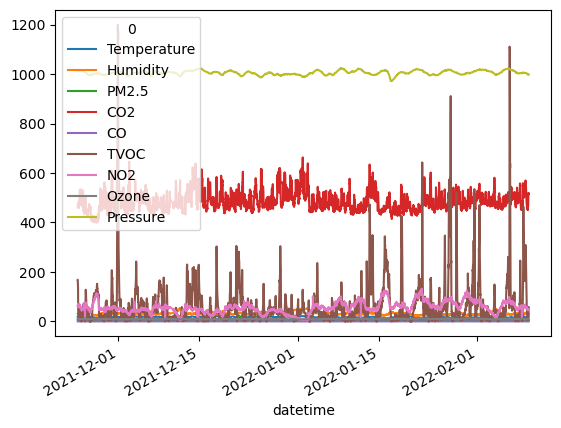

In [30]:
def plot_timeseries(df, cols=numeric_cols):
    df = df.set_index('datetime')
    df[cols].plot.line()

plot_timeseries(train)

In [32]:
from fastbook import *
from sklearn.tree import DecisionTreeRegressor

#!pip install -Uqq dtreeviz
from dtreeviz.trees import *


/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torchvision/image.so, 6): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torchvision/image.so
  Expected in: /Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/rokickik/opt/anaconda3/envs/course22/lib/python3.8/site-packages/torchvision/image.so
  warn(f"Failed to load image Python extension: {e}")


In [33]:
def try_tree(df, depvar, dropCols=[]):
    xs = df.drop(dropCols+[depvar], axis=1)
    #for col in dropCols:
    #    xs = xs.drop(col, axis=1)
    #xs = train.drop([depvar,'datetime'], axis=1)
    y = df[depvar]

    m = DecisionTreeRegressor(max_leaf_nodes=4)
    m.fit(xs, y)
    g1 = draw_tree(m, xs, size=10, leaves_parallel=True, precision=2);

    samp_idx = np.random.permutation(len(y))[:500]
    g2 = dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, depvar,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR');
    
    return g1,g2
    

In [34]:
g1, g2 = try_tree(train, 'Ozone', ['datetime','datetimeElapsed','datetimeWeek','datetimeYear'])
display(g1)
display(g2)

NameError: name 'dtreeviz' is not defined

Computing Temperature


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


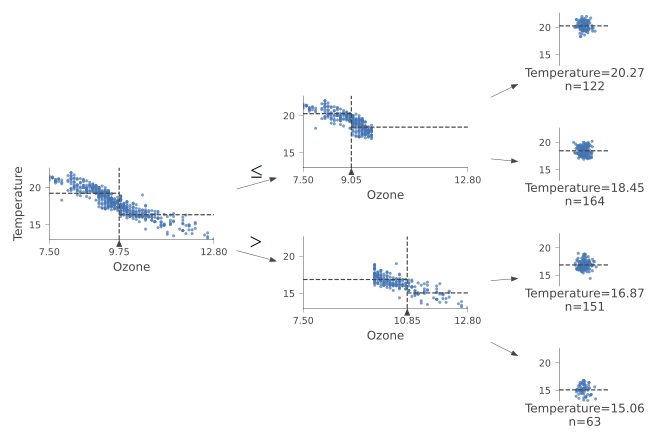

Computing Humidity


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


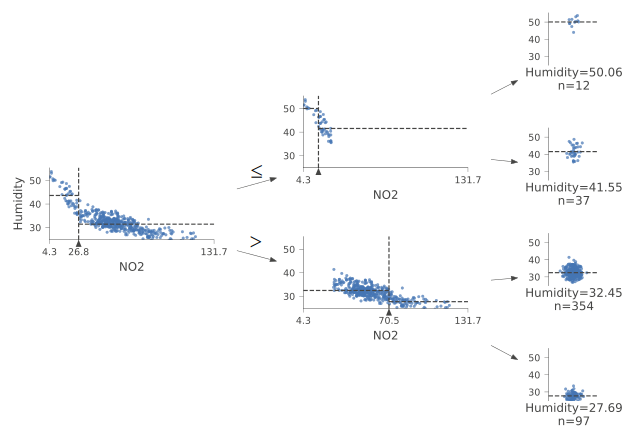

Computing PM2.5


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


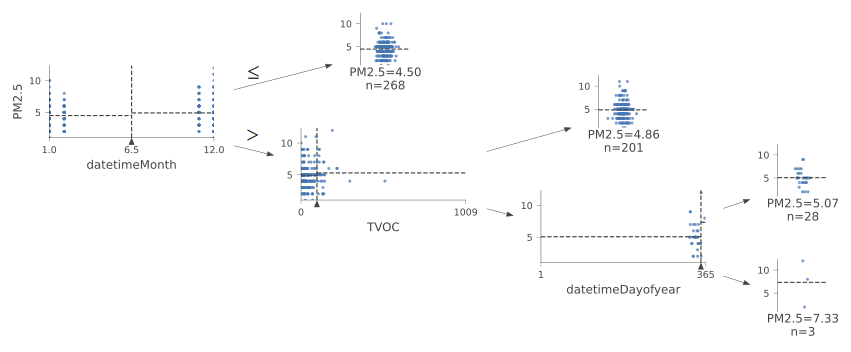

Computing CO2


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


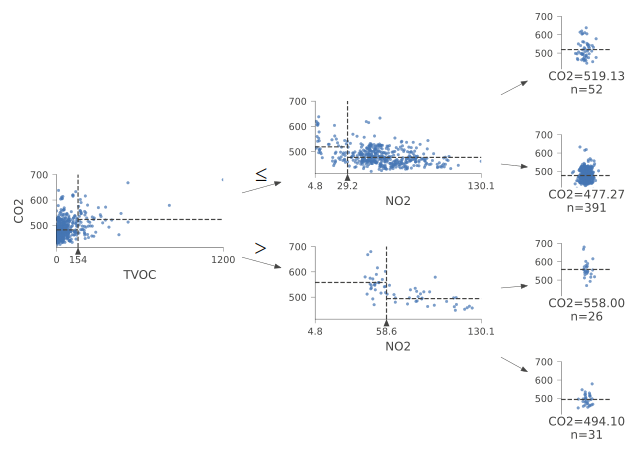

Computing CO


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/dtreeviz/trees.py:1239: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(y_range)


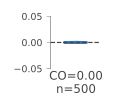

Computing TVOC


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


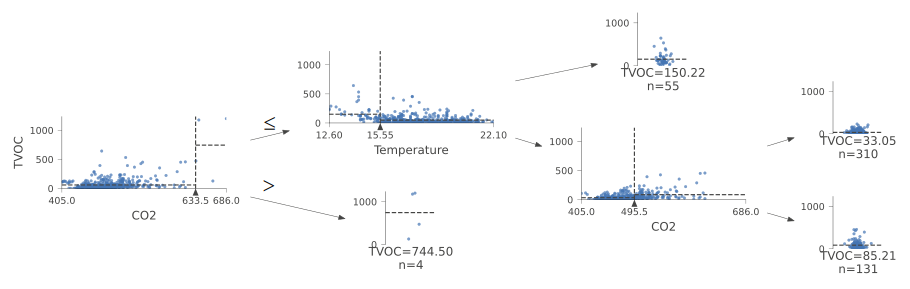

Computing NO2


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


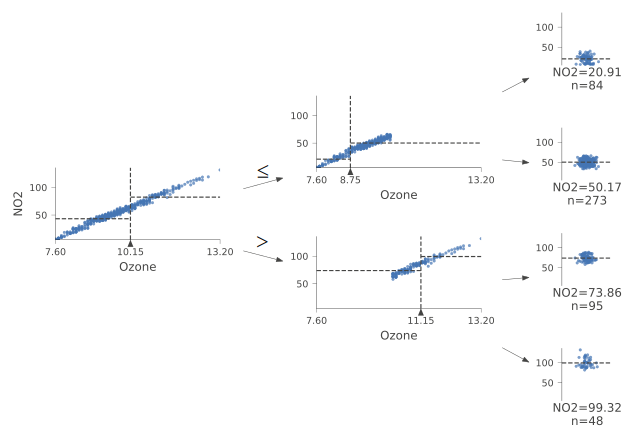

Computing Ozone


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


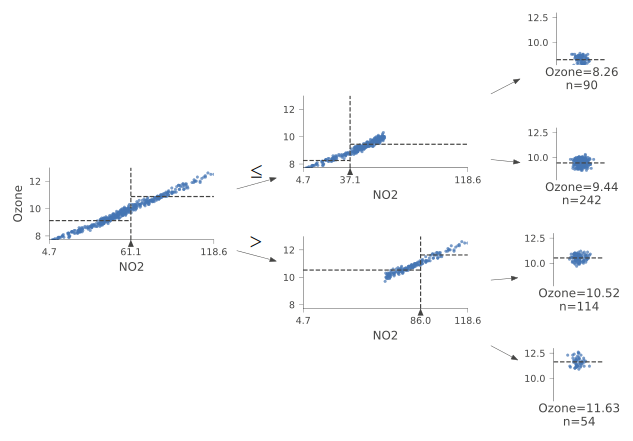

Computing Pressure


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


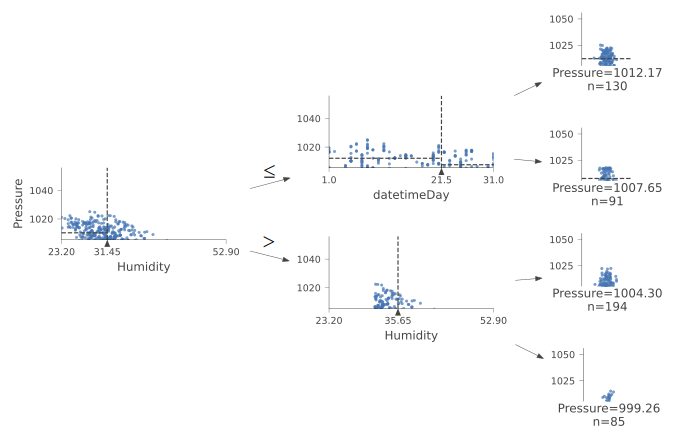

In [134]:
for col in numeric_cols:
    print("Computing", col)
    g1, g2 = try_tree(train, col, ['datetime','datetimeElapsed','datetimeWeek','datetimeYear']);
    display(g2)

# Add WeatherUnderground data

In [135]:
weatherDataFile = "WU_20210401-20210801.txt"
wdf = pd.read_csv('uHoo/'+weatherDataFile, delimiter='\t')
wdf.head()
wdf_cols = [c for c in wdf.columns if c!='Date']

In [136]:

# Convert first column to date type
wdf['Date'] = pd.to_datetime(wdf['Date'], format="%m/%d/%y")

# Set date/time index
wdf = wdf.set_index('Date')
wdf['date'] = wdf.index

In [138]:
wdf.head()

TempF_Max  TempF_Avg  TempF_Min  DewPointF_Max  DewPointF_Avg  DewPointF_Min  Humidity_Max  Humidity_Avg  Humidity_Min  \
Date                                                                                                                                 
2021-04-01         49       41.9         33             43           31.0             17            93          67.5            42   
2021-04-02         45       36.8         29             18           13.5             10            56          40.0            26   
2021-04-03         56       41.5         25             21           16.5             13            75          40.2            20   
2021-04-04         72       55.8         35             34           28.0             22            70          38.1            19   
2021-04-05         73       58.7         38             39           31.9             26            76          39.5            22   

            WindSpeedMPH_Max  WindSpeedMPH_Avg  WindSpeedMPH_Min  PressureIN_Max  PressureIN_Avg  PressureIN_Min  PrecipitationIN_Total  \
Date                                                                                                                                      
2021-04-01                30              17.0                 5            29.9            29.7            29.6                   0.88   
2021-04-02                23              15.4                 9            30.0            29.9            29.9                   0.00   
2021-04-03                13               4.8                 0            30.1            30.0            29.9                   0.00   
2021-04-04                17               8.3                 0            29.9            29.8            29.6                   0.00   
2021-04-05                10               6.1                 0            29.8            29.7            29.6                   0.00   

                 date  
Date                   
2021-04-01 2021-04-01  
2021-04-02 2021-04-02  
2021-04-03 2021-04-03  
2021-04-04 2021-04-04  
2021-04-05 2021-04-05

In [139]:
df1['date'] = pd.to_datetime(df1['datetime'].dt.date)
# Ignore the SettingWithCopyError... it still works

SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [157]:
# Create merged data set
mdf = df1.merge(wdf, on=["date"], how="outer")

# Add rain prediction column
mdf['Rain'] = np.where(mdf['PrecipitationIN_Total']>0.0, True, False)

# Drop useless columns
mdf = mdf.drop(['datetime','date'], axis=1)

# Show
mdf.head()


Temperature  Humidity  PM2.5  CO2   CO  TVOC  NO2  Ozone  Pressure  TempF_Max  TempF_Avg  TempF_Min  DewPointF_Max  DewPointF_Avg  \
0         22.8      40.7    1.0  951  0.0    78  3.1    7.1     994.1         49       41.9         33             43           31.0   
1         22.8      40.5    1.0  955  0.0    77  3.0    7.1     994.0         49       41.9         33             43           31.0   
2         22.8      40.6    1.0  959  0.0    71  4.7    7.2     994.2         49       41.9         33             43           31.0   
3         22.5      40.7    1.0  928  0.0    37  4.2    7.2     994.3         49       41.9         33             43           31.0   
4         22.6      40.7    1.0  934  0.0    38  4.9    7.2     994.3         49       41.9         33             43           31.0   

   DewPointF_Min  Humidity_Max  Humidity_Avg  Humidity_Min  WindSpeedMPH_Max  WindSpeedMPH_Avg  WindSpeedMPH_Min  PressureIN_Max  \
0             17            93          67.5            42                30              17.0                 5            29.9   
1             17            93          67.5            42                30              17.0                 5            29.9   
2             17            93          67.5            42                30              17.0                 5            29.9   
3             17            93          67.5            42                30              17.0                 5            29.9   
4             17            93          67.5            42                30              17.0                 5            29.9   

   PressureIN_Avg  PressureIN_Min  PrecipitationIN_Total  Rain  
0            29.7            29.6                   0.88  True  
1            29.7            29.6                   0.88  True  
2            29.7            29.6                   0.88  True  
3            29.7            29.6                   0.88  True  
4            29.7            29.6                   0.88  True

In [158]:
train, valid, test = cutDataSet(mdf)

train

Total rows:  8667
Train cut:  6933
Valid cut:  7800
Test cut:  8667


Temperature  Humidity  PM2.5  CO2   CO  TVOC  NO2  Ozone  Pressure  TempF_Max  TempF_Avg  TempF_Min  DewPointF_Max  DewPointF_Avg  \
0            22.8      40.7    1.0  951  0.0    78  3.1    7.1     994.1         49       41.9         33             43           31.0   
1            22.8      40.5    1.0  955  0.0    77  3.0    7.1     994.0         49       41.9         33             43           31.0   
2            22.8      40.6    1.0  959  0.0    71  4.7    7.2     994.2         49       41.9         33             43           31.0   
3            22.5      40.7    1.0  928  0.0    37  4.2    7.2     994.3         49       41.9         33             43           31.0   
4            22.6      40.7    1.0  934  0.0    38  4.9    7.2     994.3         49       41.9         33             43           31.0   
...           ...       ...    ...  ...  ...   ...  ...    ...       ...        ...        ...        ...            ...            ...   
6928         23.2      54.0    1.0  792  0.0    68  0.0    6.9     998.2         95       82.8         71             75           70.9   
6929         23.2      53.9    1.0  793  0.0    67  0.1    6.8     998.3         95       82.8         71             75           70.9   
6930         23.2      53.9    1.0  784  0.0    66  0.8    6.9     998.3         95       82.8         71             75           70.9   
6931         23.3      53.4    1.0  753  0.0    54  0.6    6.9     997.9         95       82.8         71             75           70.9   
6932         23.3      53.3    1.0  755  0.0    51  0.7    6.8     997.8         95       82.8         71             75           70.9   

      DewPointF_Min  Humidity_Max  Humidity_Avg  Humidity_Min  WindSpeedMPH_Max  WindSpeedMPH_Avg  WindSpeedMPH_Min  PressureIN_Max  \
0                17            93          67.5            42                30              17.0                 5            29.9   
1                17            93          67.5            42                30              17.0                 5            29.9   
2                17            93          67.5            42                30              17.0                 5            29.9   
3                17            93          67.5            42                30              17.0                 5            29.9   
4                17            93          67.5            42                30              17.0                 5            29.9   
...             ...           ...           ...           ...               ...               ...               ...             ...   
6928             66            90          68.5            47                12               3.5                 0            29.7   
6929             66            90          68.5            47                12               3.5                 0            29.7   
6930             66            90          68.5            47                12               3.5                 0            29.7   
6931             66            90          68.5            47                12               3.5                 0            29.7   
6932             66            90          68.5            47                12               3.5                 0            29.7   

      PressureIN_Avg  PressureIN_Min  PrecipitationIN_Total   Rain  
0               29.7            29.6                   0.88   True  
1               29.7            29.6                   0.88   True  
2               29.7            29.6                   0.88   True  
3               29.7            29.6                   0.88   True  
4               29.7            29.6                   0.88   True  
...              ...             ...                    ...    ...  
6928            29.6            29.6                   0.00  False  
6929            29.6            29.6                   0.00  False  
6930            29.6            29.6                   0.00  False  
6931            29.6      

Total rows:  8667
Train cut:  6933
Valid cut:  7800
Test cut:  8667


/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


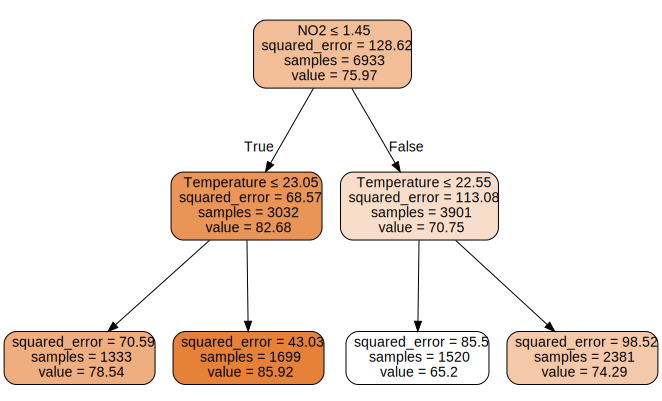

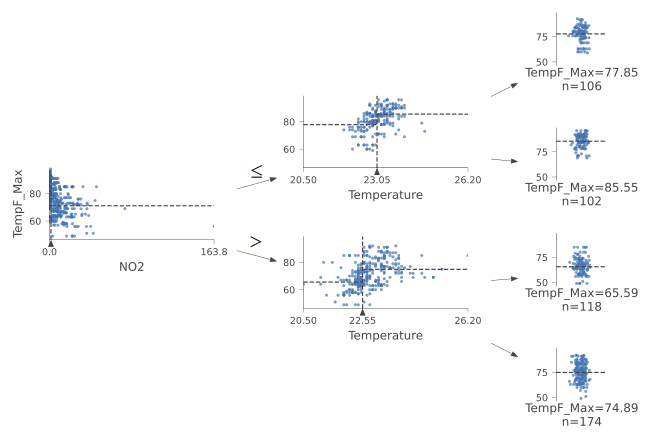

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


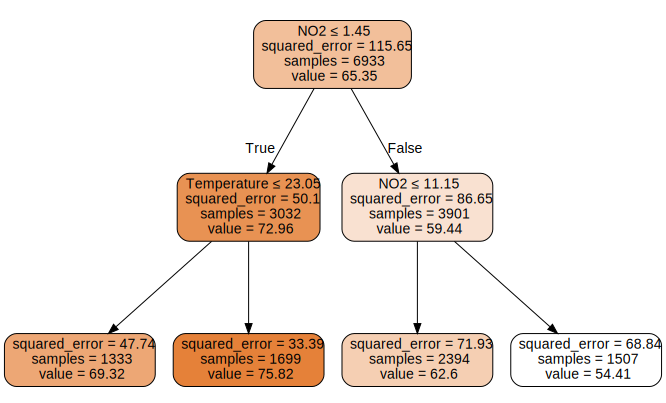

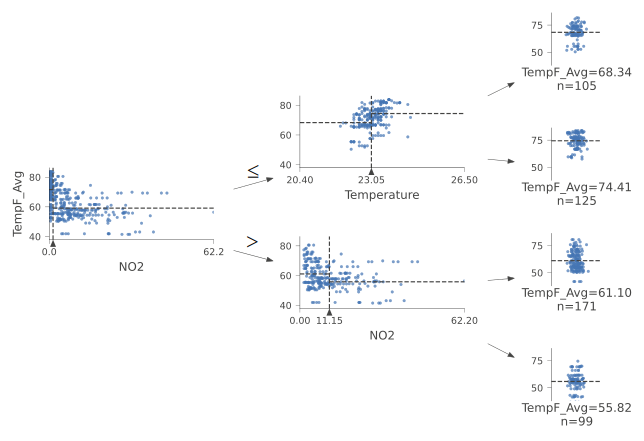

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


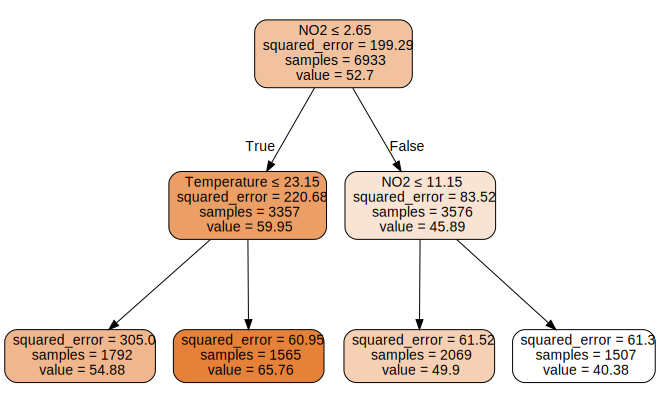

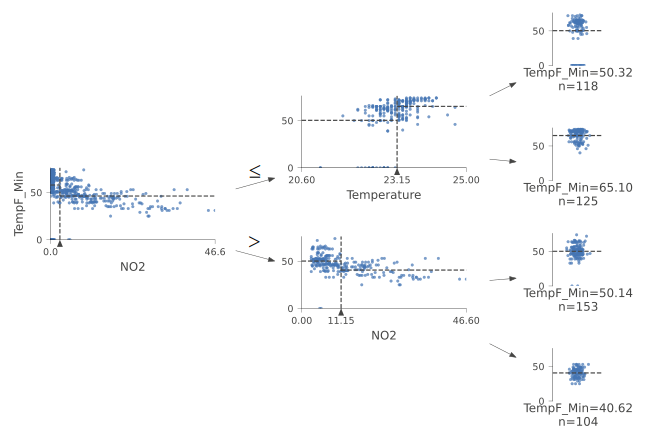

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


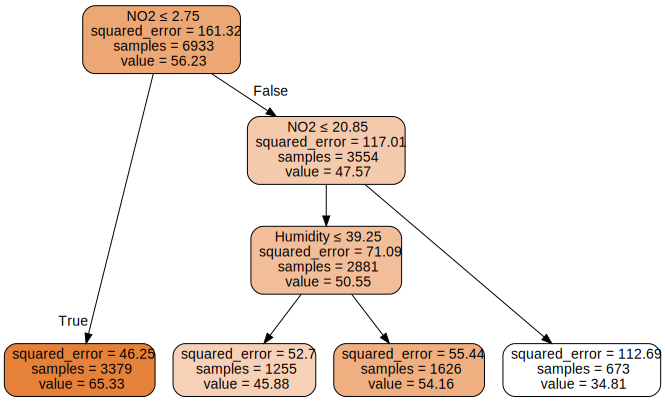

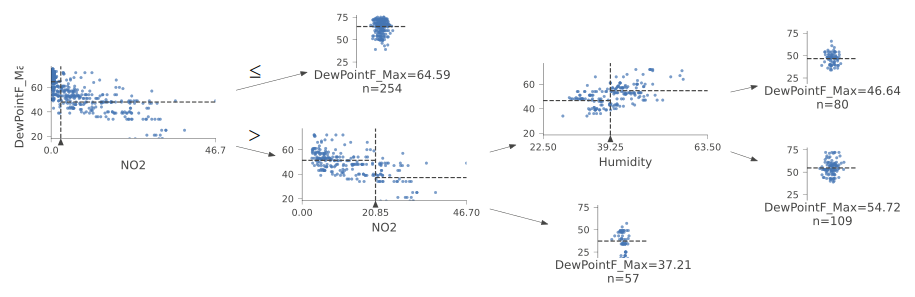

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


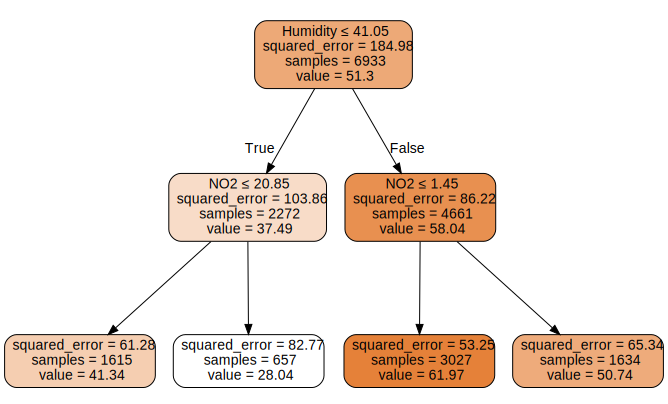

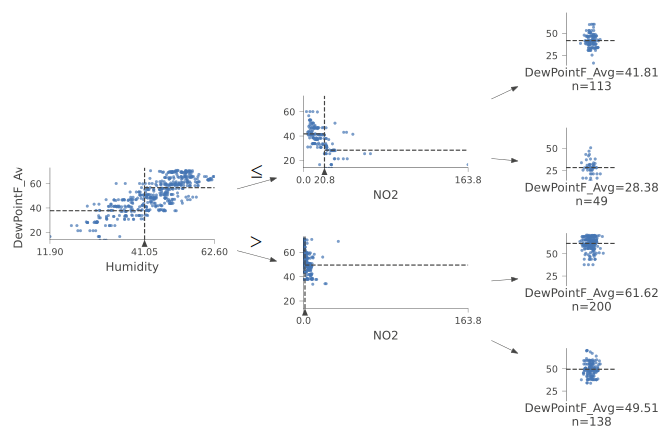

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


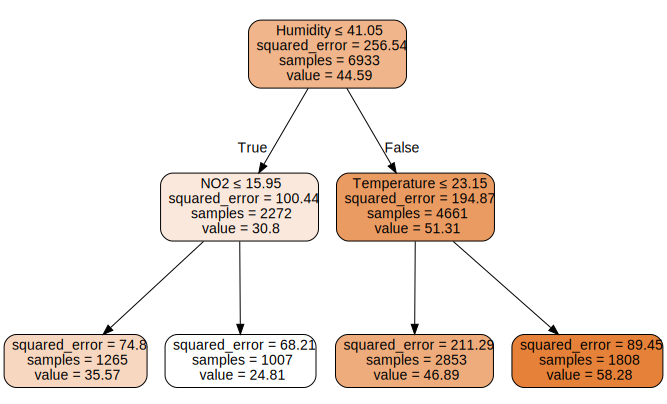

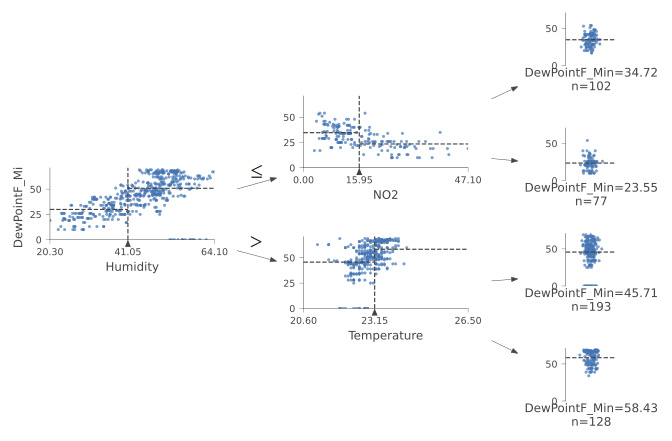

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


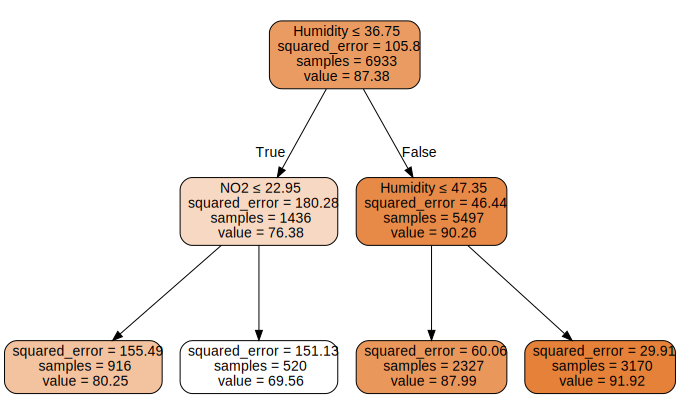

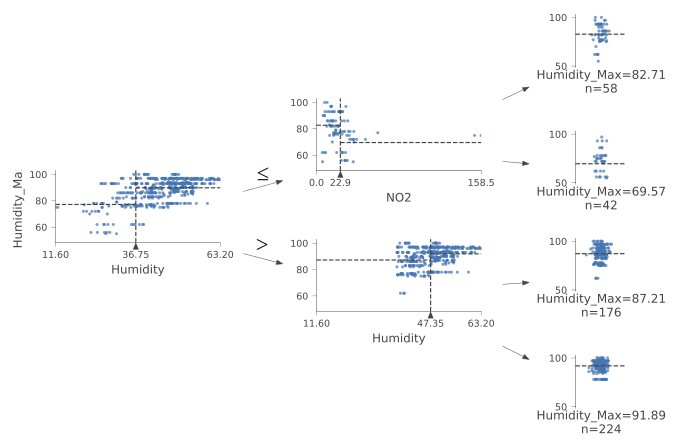

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


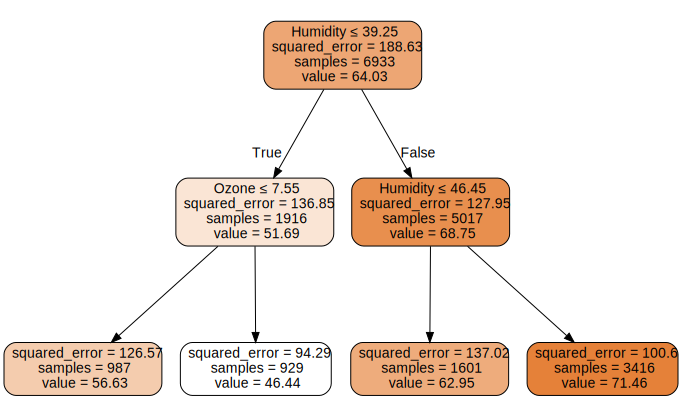

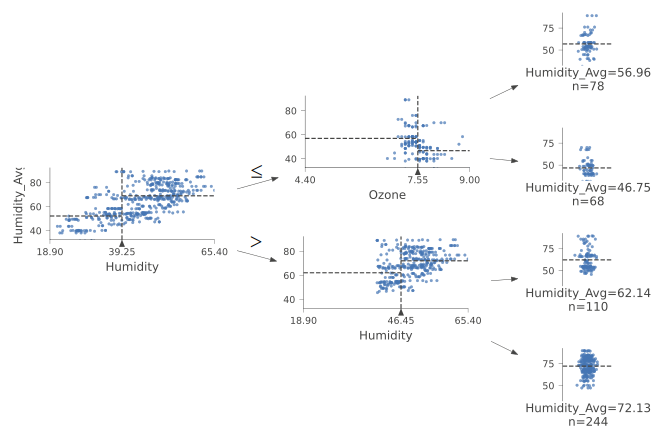

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


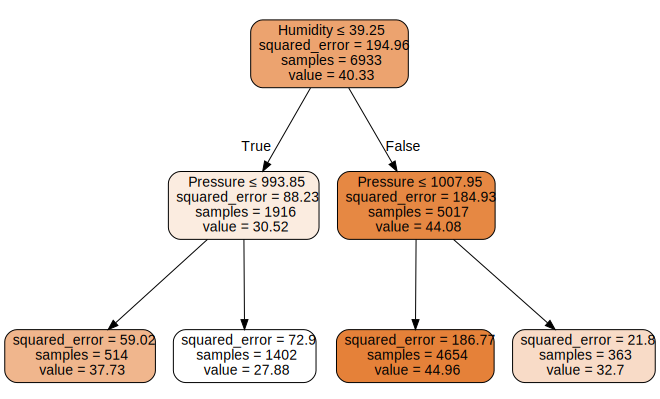

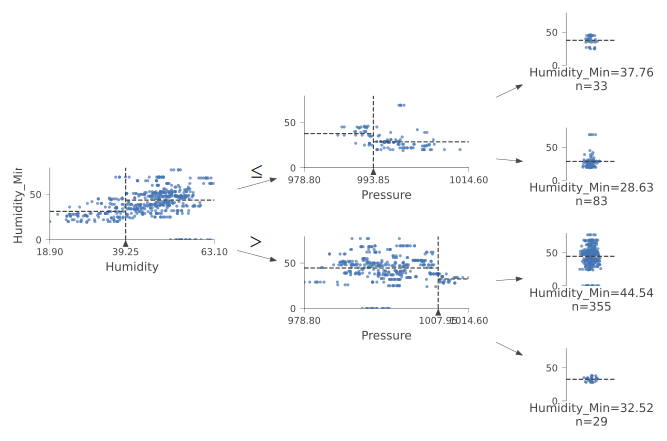

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


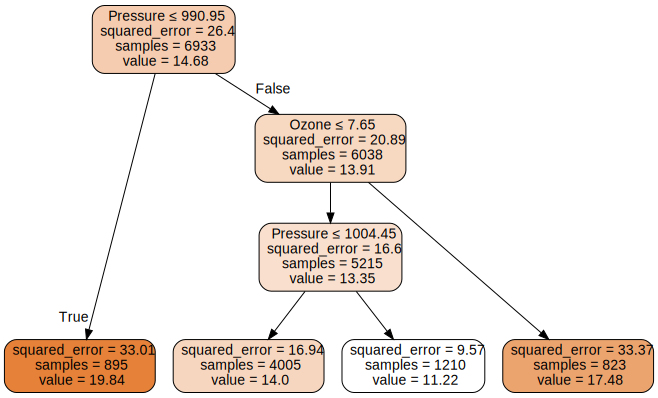

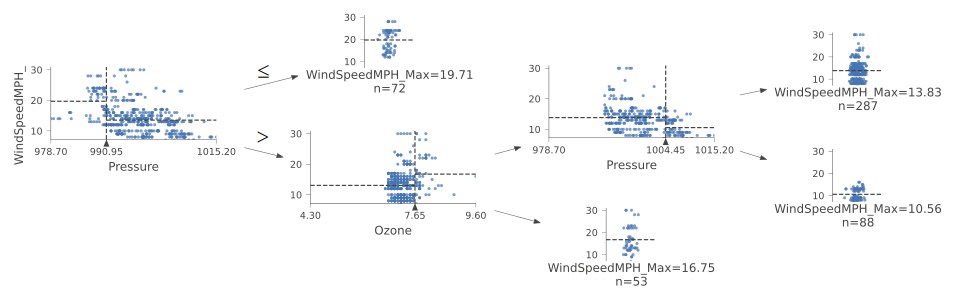

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


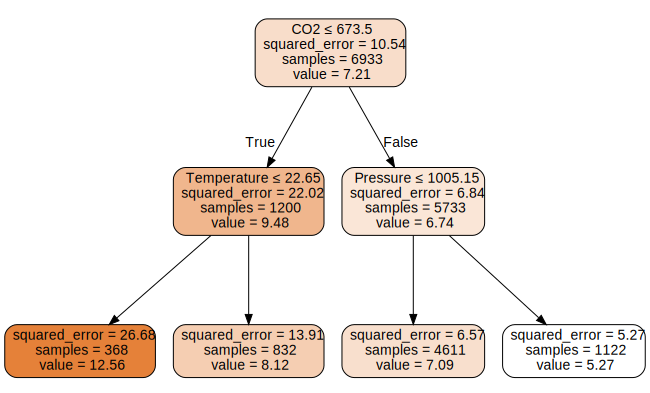

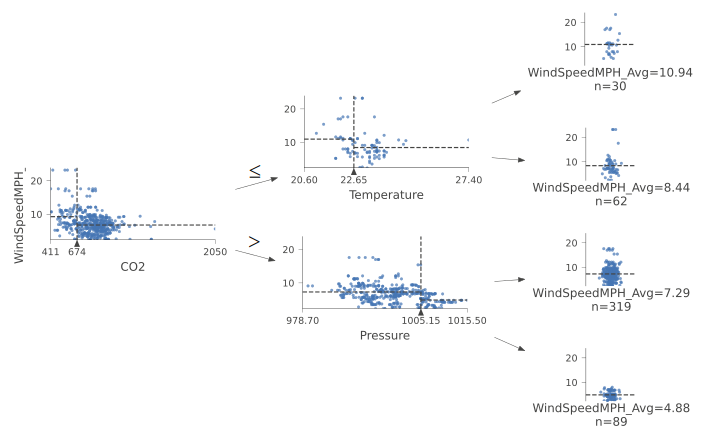

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


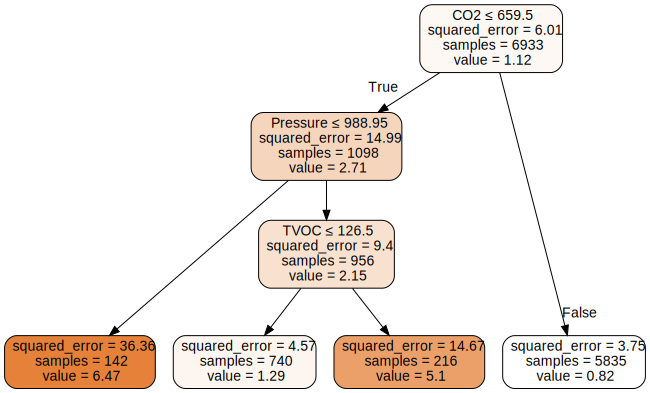

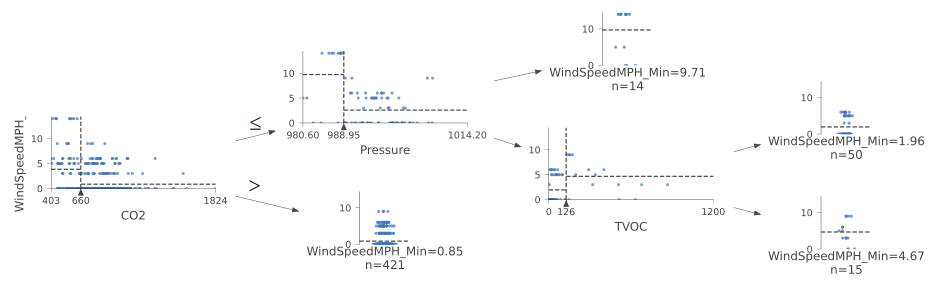

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


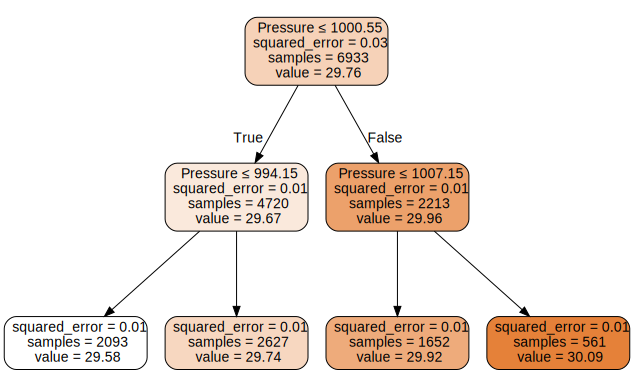

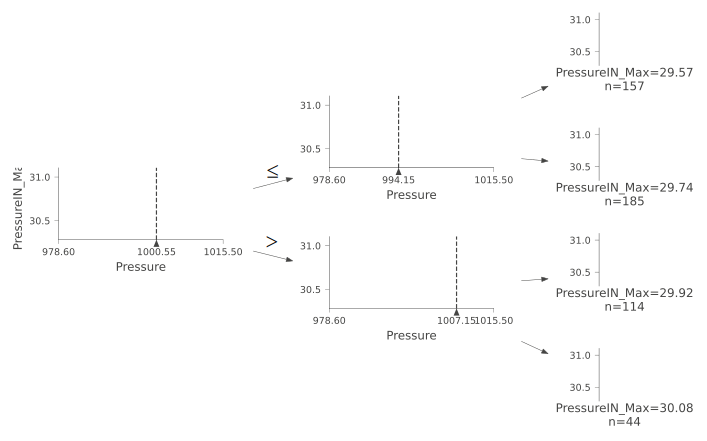

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


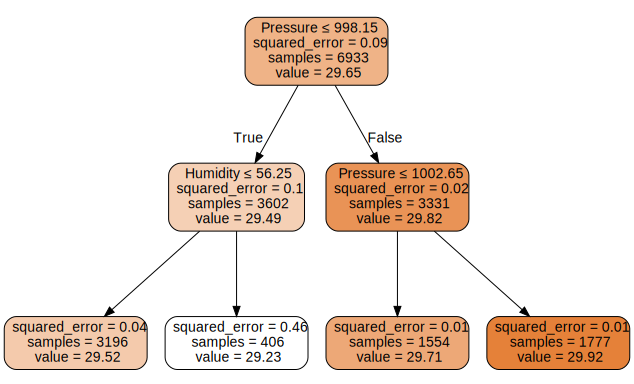

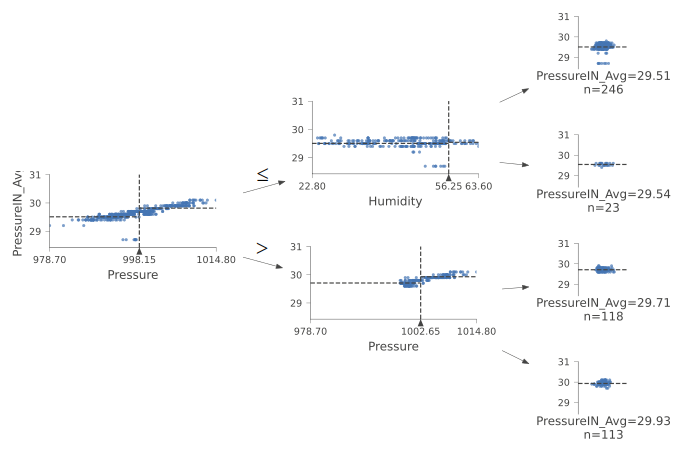

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


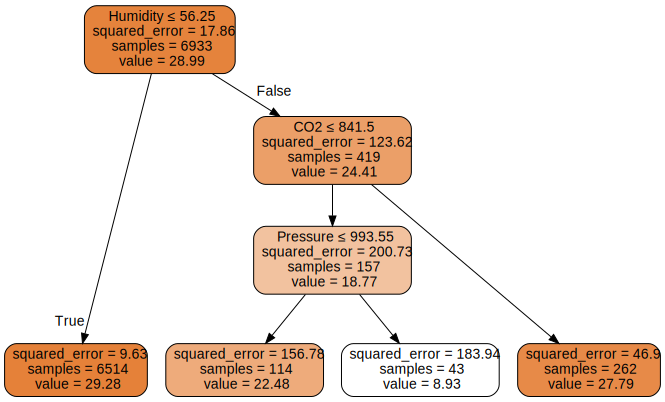

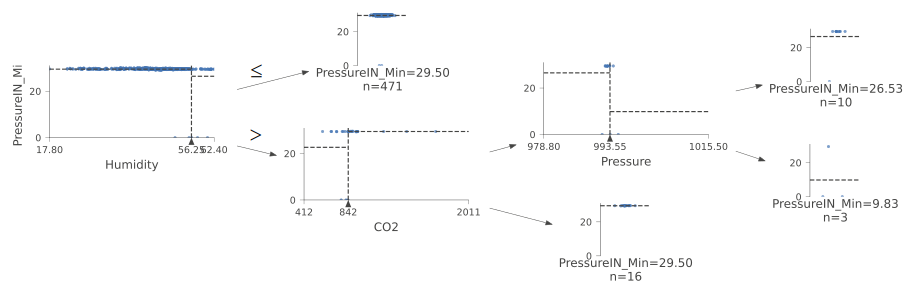

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


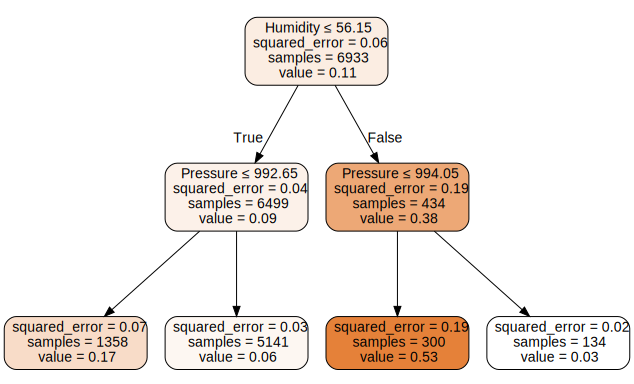

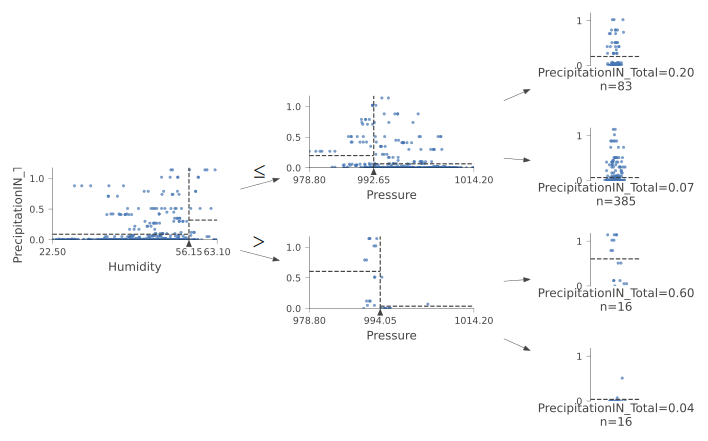

In [70]:
for col in wdf_cols:
    print("Computing", col)
    g1, g2 = try_tree(train, col, ['datetime','date']+wdf_cols);
    display(g1)
    display(g2)

In [160]:
indoor_cols = numeric_cols
print('Indoor:',indoor_cols)
outdoor_cols = wdf_cols+['Rain']
print('Outdoor:',outdoor_cols)

# indoor pressure in hectoPascals (millibars)
# outdoor pressure in "sea-level pressure"

Indoor: ['Temperature', 'Humidity', 'PM2.5', 'CO2', 'CO', 'TVOC', 'NO2', 'Ozone', 'Pressure']
Outdoor: ['TempF_Max', 'TempF_Avg', 'TempF_Min', 'DewPointF_Max', 'DewPointF_Avg', 'DewPointF_Min', 'Humidity_Max', 'Humidity_Avg', 'Humidity_Min', 'WindSpeedMPH_Max', 'WindSpeedMPH_Avg', 'WindSpeedMPH_Min', 'PressureIN_Max', 'PressureIN_Avg', 'PressureIN_Min', 'PrecipitationIN_Total', 'Rain']


In [161]:
from fastai.tabular.all import *
splits = (list(train.index), list(valid.index))

In [206]:
# Based on https://docs.fast.ai/tutorial.tabular.html
 
dep_var='Pressure'

x_names = [c for c in indoor_cols if c!=dep_var] \
    + [c for c in outdoor_cols if c!='Rain' and c!=dep_var]
print(x_names)

to = TabularPandas(mdf, procs=[Categorify, FillMissing, Normalize],
                   cat_names = ['Rain'],
                   cont_names = x_names,
                   y_names=dep_var,
                   splits=splits)

['Temperature', 'Humidity', 'PM2.5', 'CO2', 'CO', 'TVOC', 'NO2', 'Ozone', 'TempF_Max', 'TempF_Avg', 'TempF_Min', 'DewPointF_Max', 'DewPointF_Avg', 'DewPointF_Min', 'Humidity_Max', 'Humidity_Avg', 'Humidity_Min', 'WindSpeedMPH_Max', 'WindSpeedMPH_Avg', 'WindSpeedMPH_Min', 'PressureIN_Max', 'PressureIN_Avg', 'PressureIN_Min', 'PrecipitationIN_Total']


In [207]:
print(len(x_names))

mdf

24


Temperature  Humidity  PM2.5   CO2   CO  TVOC  NO2  Ozone  Pressure  TempF_Max  TempF_Avg  TempF_Min  DewPointF_Max  DewPointF_Avg  \
0            22.8      40.7    1.0   951  0.0    78  3.1    7.1     994.1         49       41.9         33             43           31.0   
1            22.8      40.5    1.0   955  0.0    77  3.0    7.1     994.0         49       41.9         33             43           31.0   
2            22.8      40.6    1.0   959  0.0    71  4.7    7.2     994.2         49       41.9         33             43           31.0   
3            22.5      40.7    1.0   928  0.0    37  4.2    7.2     994.3         49       41.9         33             43           31.0   
4            22.6      40.7    1.0   934  0.0    38  4.9    7.2     994.3         49       41.9         33             43           31.0   
...           ...       ...    ...   ...  ...   ...  ...    ...       ...        ...        ...        ...            ...            ...   
8662         22.2      50.2    1.0  1068  0.0   158  0.0    7.2     995.8         83       74.0         67             62           57.0   
8663         22.2      50.2    1.0  1071  0.0   158  0.4    7.2     995.8         83       74.0         67             62           57.0   
8664         22.3      47.5    1.0   997  0.0   147  0.6    7.2     995.7         83       74.0         67             62           57.0   
8665         22.3      50.7    1.0   998  0.0   142  0.6    7.2     995.7         83       74.0         67             62           57.0   
8666         22.1      50.6    1.0   995  0.0   135  0.7    7.2     995.7         83       74.0         67             62           57.0   

      DewPointF_Min  Humidity_Max  Humidity_Avg  Humidity_Min  WindSpeedMPH_Max  WindSpeedMPH_Avg  WindSpeedMPH_Min  PressureIN_Max  \
0                17            93          67.5            42                30              17.0                 5            29.9   
1                17            93          67.5            42                30              17.0                 5            29.9   
2                17            93          67.5            42                30              17.0                 5            29.9   
3                17            93          67.5            42                30              17.0                 5            29.9   
4                17            93          67.5            42                30              17.0                 5            29.9   
...             ...           ...           ...           ...               ...               ...               ...             ...   
8662             53            68          55.9            42                 8               5.5                 0            29.7   
8663             53            68          55.9            42                 8               5.5                 0            29.7   
8664             53            68          55.9            42                 8               5.5                 0            29.7   
8665             53            68          55.9            42                 8               5.5                 0            29.7   
8666             53            68          55.9            42                 8               5.5                 0            29.7   

      PressureIN_Avg  PressureIN_Min  PrecipitationIN_Total   Rain  
0               29.7            29.6                   0.88   True  
1               29.7            29.6                   0.88   True  
2               29.7            29.6                   0.88   True  
3               29.7            29.6                   0.88   True  
4               29.7            29.6                   0.88   True  
...              ...             ...                    ...    ...  
8662            29.6            29.6                   0.00  False  
8663            29.6            29.6                   0.00  False  
8664            29.6            29.6                   0.00  False  
8665          

In [208]:
dls = to.dataloaders(bs=64)

dls.show_batch()

SuggestedLRs(valley=0.03981071710586548)

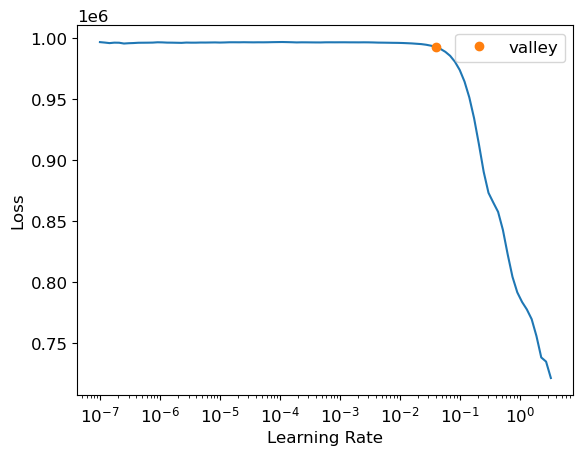

In [196]:
learn = tabular_learner(dls, loss_func=F.mse_loss, metrics=accuracy, layers=[500,250])
learn.lr_find()

In [176]:
#learn.fit_one_cycle(1)
learn.fit(n_epoch=10)

In [ ]:
learn.show_results()

/Users/rokickik/opt/miniconda3/envs/course23/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


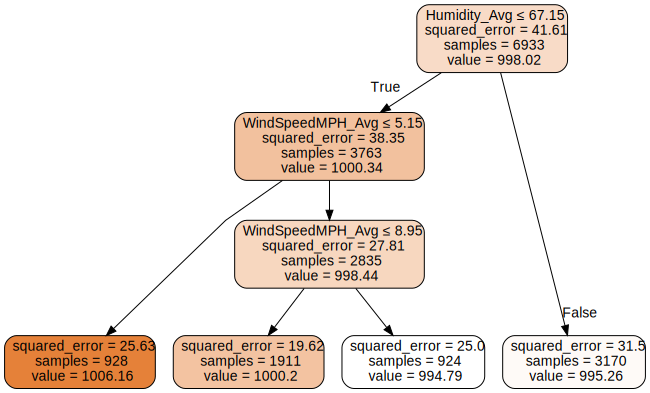

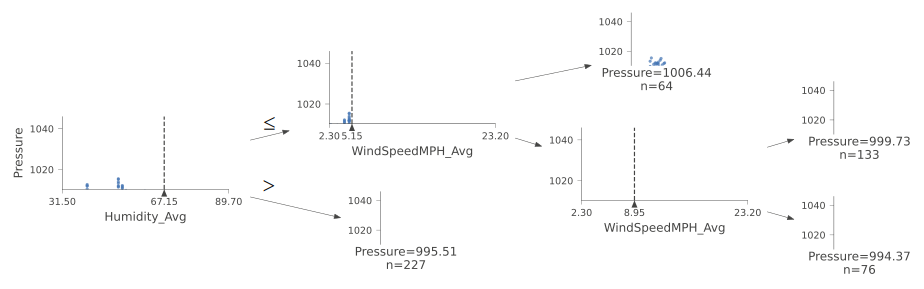

In [163]:
g1, g2 = try_tree(train, 'Pressure', ['Pressure','PressureIN_Avg','PressureIN_Min','PressureIN_Max']);
display(g1)
display(g2)